# Step 1: Masukkan Amunisi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Library penting ga penting
from matplotlib import font_manager

# Step 2: Akses Data

In [2]:
data_path = os.path.join("Data Science 101", "Data Mobil.csv")
data = pd.read_csv(data_path)

# Step 3: Meninjau Data

In [60]:
print('Dimensi Data')

num_rows, num_cols = data.shape

# Menampilkan jumlah baris dan kolom
print(f"Kolom : {num_cols}")
print(f"Baris : {num_rows}")

Dimensi Data
Kolom : 13
Baris : 5572


## 3.1 | Informasi Apa Saja Yang Ada

In [61]:
print('Informasi Data')
data.info()

Informasi Data
<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                5572 non-null   object 
 1   Tipe                 5572 non-null   object 
 2   Lokasi Terjual       5572 non-null   object 
 3   Kepemilikan          5572 non-null   object 
 4   BBM                  5572 non-null   object 
 5   Transmisi            5572 non-null   object 
 6   Tahun                5572 non-null   int64  
 7   Odometer (KM)        5572 non-null   int64  
 8   Efisiensi BBM        5572 non-null   float64
 9   Kubikasi             5572 non-null   float64
 10  Tenaga               5572 non-null   float64
 11  Jumlah Tempat Duduk  5572 non-null   float64
 12  Harga                5572 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 609.4+ KB


## 3.2 | Ganti Nama Kolom

Langkah Opsional jika diperllukan

In [5]:
new_column_names = {
        'Unnamed: 0': 'Nomor',
        'Name': 'Mobil',
        'Location' : 'Lokasi Terjual',
        'Year' : 'Tahun',
        'Kilometers_Driven' : 'Odometer (KM)',
        'Fuel_Type' : 'BBM',
        'Transmission' : 'Transmisi',
        'Owner_Type' : 'Kepemilikan',
        'Mileage' : 'Efisiensi BBM',
        'Engine' : 'Kubikasi',
        'Power' : 'Tenaga',
        'Seats' : 'Jumlah Tempat Duduk',
        'New_Price' : 'Harga Mobil Baru Sejenis',
        'Price' : 'Harga'
        }

data.rename(columns=new_column_names, inplace=True)

## 3.2.1 | Melihat informasi data

Menampilkan info data untuk melihat sekaligus testing apakah terdapat nama kolom yang terjadi kekeliruan

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nomor                     6019 non-null   int64  
 1   Mobil                     6019 non-null   object 
 2   Lokasi Terjual            6019 non-null   object 
 3   Tahun                     6019 non-null   int64  
 4   Odometer (KM)             6019 non-null   int64  
 5   BBM                       6019 non-null   object 
 6   Transmisi                 6019 non-null   object 
 7   Kepemilikan               6019 non-null   object 
 8   Efisiensi BBM             6017 non-null   object 
 9   Kubikasi                  5983 non-null   object 
 10  Tenaga                    5983 non-null   object 
 11  Jumlah Tempat Duduk       5977 non-null   float64
 12  Harga Mobil Baru Sejenis  824 non-null    object 
 13  Harga                     6019 non-null   float64
dtypes: float

### 3.2.2 | Tes Tampilan Tabel

In [63]:
data.head()

,Brand,Tipe,Lokasi Terjual,Kepemilikan,BBM,Transmisi,Tahun,Odometer (KM),Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
0,Maruti,Maruti Wagon,Mumbai,First,CNG,Manual,2010,72000,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Hyundai Creta,Pune,First,Diesel,Manual,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,Honda,Honda Jazz,Chennai,First,Petrol,Manual,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Maruti Ertiga,Chennai,First,Diesel,Manual,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,Audi,Audi A4,Coimbatore,Second,Diesel,Automatic,2013,40670,15.20,1968.0,140.80,5.0,17.74


## Cek Anomali

### Jumlah Baris Kosong

In [8]:
data.isnull().sum()

Nomor                          0
Mobil                          0
Lokasi Terjual                 0
Tahun                          0
Odometer (KM)                  0
BBM                            0
Transmisi                      0
Kepemilikan                    0
Efisiensi BBM                  2
Kubikasi                      36
Tenaga                        36
Jumlah Tempat Duduk           42
Harga Mobil Baru Sejenis    5195
Harga                          0
dtype: int64

### Cek Unique Value

In [9]:
data.nunique()

Nomor                       6019
Mobil                       1876
Lokasi Terjual                11
Tahun                         22
Odometer (KM)               3093
BBM                            5
Transmisi                      2
Kepemilikan                    4
Efisiensi BBM                442
Kubikasi                     146
Tenaga                       372
Jumlah Tempat Duduk            9
Harga Mobil Baru Sejenis     540
Harga                       1373
dtype: int64

## Deskripsi Data
Melihat Descriptive Statisitik dari data

In [10]:
data.describe(include='all')

,Nomor,Mobil,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga Mobil Baru Sejenis,Harga
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


#### Ternyata tidak semua data perlu dianalisis sehingga kita analisis untuk data numeric saja.

Untuk tampilan lebih detail, kita bisa Describe untuk masing-masing data Numeric dan Non Numeric

In [11]:
data.describe(include='number')

,Nomor,Tahun,Odometer (KM),Jumlah Tempat Duduk,Harga
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [12]:
data.describe(include='object')

,Mobil,Lokasi Terjual,BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Harga Mobil Baru Sejenis
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


# Step 4: Persiapan Data

### Cek nilai kosong

In [13]:
data.isna().sum()

Nomor                          0
Mobil                          0
Lokasi Terjual                 0
Tahun                          0
Odometer (KM)                  0
BBM                            0
Transmisi                      0
Kepemilikan                    0
Efisiensi BBM                  2
Kubikasi                      36
Tenaga                        36
Jumlah Tempat Duduk           42
Harga Mobil Baru Sejenis    5195
Harga                          0
dtype: int64

Karena Kolom Nomor tidak perlu untuk dipertimbangkan dalam pengolahan dan analisis data serta terdapat terlalu banyak nilai kosong pada Harga Mobil Baru Sejenis, maka untuk keakuratan model kita eliminasi saja kedua kolom tersebut.

### Hilangkan Kolom 'Nomor' dan 'Harga Mobil Baru'

In [14]:
data.drop(columns = ['Nomor','Harga Mobil Baru Sejenis'],inplace = True)

### Cek Data (Opsional)

In [15]:
data.head()

,Mobil,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### Cek Nilai Duplikat

In [16]:
data.duplicated().sum()

0

Surprisingly tidak ada value yang redundant

## Ganti Jenis Data
Mengingat tipe data untuk Efisiensi BBM, Kubikasi, dan Tenaga adalah Objek, kita ganti ke Float

In [17]:
data['Efisiensi BBM'] = data['Efisiensi BBM'].str.split(expand=True)[0].astype(float)
data['Kubikasi'] = data['Kubikasi'].str.split(expand=True)[0].astype(float)

In [18]:
print('Value dengan isi null bhp awal :', (data['Tenaga'] == 'null bhp').sum())
data['Tenaga'] = data['Tenaga'].replace('null bhp', np.nan)
data['Tenaga'] = data['Tenaga'].str.split(expand=True)[0].astype(float)
print('Value dengan isi null bhp sekarang :', (data['Tenaga'] == 'null bhp').sum())

Value dengan isi null bhp awal : 107
Value dengan isi null bhp sekarang : 0


Benarkah null bhp sudah hilang? kta bisa ambil bebrapa sampelnya

In [19]:
data.sample(20)

,Mobil,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
1725,Maruti Ciaz Zeta,Mumbai,2017,5500,Petrol,Manual,First,21.56,1462.0,103.25,5.0,8.20
1158,Maruti SX4 ZDI,Chennai,2011,80000,Diesel,Manual,Third,21.50,1248.0,88.80,5.0,3.50
3387,Honda Brio S Option AT,Chennai,2012,31500,Petrol,Automatic,First,16.50,1198.0,86.80,5.0,4.15
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.00,799.0,NaN,2.0,3.00
5063,Hyundai Creta 1.6 SX Plus Petrol Automatic,Mumbai,2016,28000,Petrol,Automatic,First,13.00,1591.0,121.30,5.0,11.85
4797,Hyundai i20 1.2 Asta,Chennai,2011,47000,Petrol,Manual,First,17.00,1197.0,80.00,5.0,4.50
1932,Ford EcoSport 1.5 Diesel Titanium,Mumbai,2017,26000,Diesel,Manual,First,23.00,1498.0,98.96,5.0,8.99
1513,Land Rover Range Rover 2.2L Pure,Bangalore,2014,56000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,34.50
4568,Hyundai i20 Asta 1.4 CRDi,Hyderabad,2012,80000,Diesel,Manual,First,21.27,1396.0,88.76,5.0,4.50
4419,Ford EcoSport 1.5 Ti VCT MT Titanium,Mumbai,2014,31130,Petrol,Manual,First,15.85,1499.0,110.40,5.0,5.75


In [20]:
data.isna().sum()

Mobil                    0
Lokasi Terjual           0
Tahun                    0
Odometer (KM)            0
BBM                      0
Transmisi                0
Kepemilikan              0
Efisiensi BBM            2
Kubikasi                36
Tenaga                 143
Jumlah Tempat Duduk     42
Harga                    0
dtype: int64

Masih terdapat value yang kosong di kolom Kubikasi, Tenaga, dan Jumlah Tempat Duduk. Kalau kita remove data kolom tersebut, saya rasa akan ada hasil yang tidak bisa kita lihat. Mungkin akan lebih baik ketika kita isi dengan mean atau median.

Kita harus cek sebaiknya menggunakan mean atau median. Ada beberapa cara salah satunya bisa mengggunakan Histogram dan Boxplot untuk sebaran Tenaga

### Cek Distribusi Value Tenaga

Text(0, 0.5, 'Frekuensi')

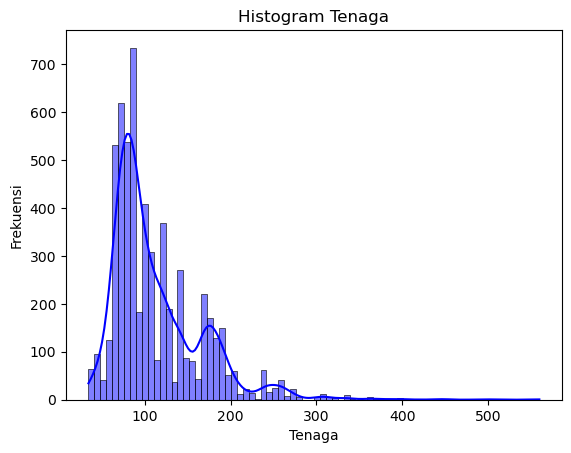

In [21]:
sns.histplot(data['Tenaga'], kde=True, bins='auto', color='blue')

plt.title('Histogram Tenaga')
plt.xlabel('Tenaga')
plt.ylabel('Frekuensi')

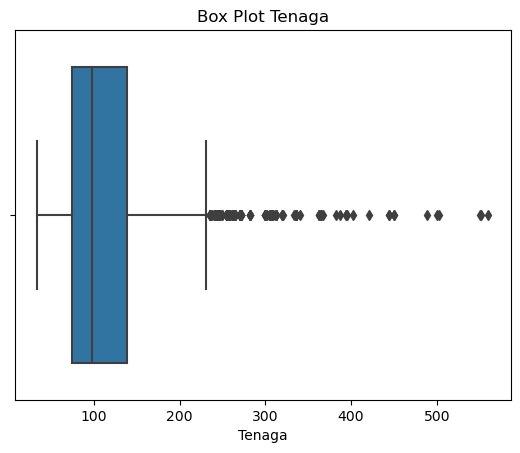

In [22]:
sns.boxplot(x=data['Tenaga'])

plt.title('Box Plot Tenaga')
plt.xlabel('Tenaga')
plt.show()

Secara visual data lebih cenderung tersebar di sebelah kiri atau data yang kecil dan outlier sangat jauh maka bisa kita gunakan median



In [23]:
median_tenaga = data['Tenaga'].median()

print(f'Median Tenaga: {median_tenaga}')

Median Tenaga: 97.7


### Kita isi Tenaga yang kosong dengan Median

In [24]:
data['Tenaga'].fillna(data['Tenaga'].median(), inplace=True)
data.isna().sum()

Mobil                   0
Lokasi Terjual          0
Tahun                   0
Odometer (KM)           0
BBM                     0
Transmisi               0
Kepemilikan             0
Efisiensi BBM           2
Kubikasi               36
Tenaga                  0
Jumlah Tempat Duduk    42
Harga                   0
dtype: int64

### Cek Dstribusi Kubikasi

Text(0, 0.5, 'Frekuensi')

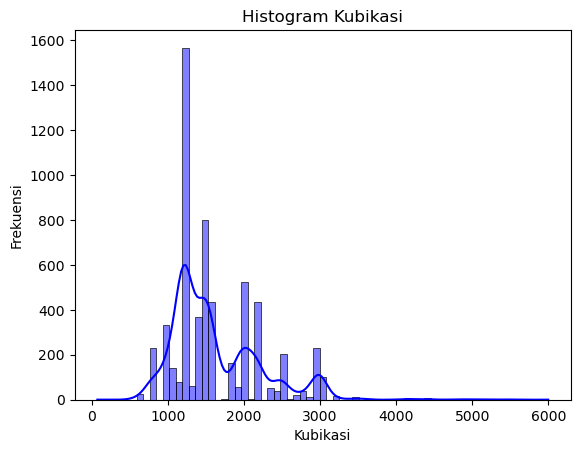

In [25]:
sns.histplot(data['Kubikasi'], kde=True, bins='auto', color='blue')

plt.title('Histogram Kubikasi')
plt.xlabel('Kubikasi')
plt.ylabel('Frekuensi')

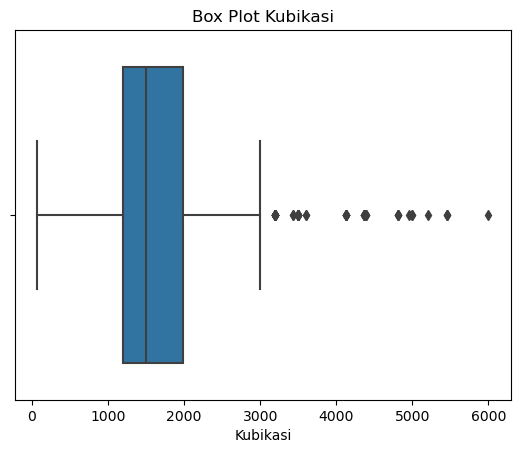

In [26]:
sns.boxplot(x=data['Kubikasi'])

plt.title('Box Plot Kubikasi')
plt.xlabel('Kubikasi')
plt.show()

In [27]:
median_kubikasi = data['Kubikasi'].median()

print(f'Median Kubikasi: {median_kubikasi}')

Median Kubikasi: 1493.0


Secara visual data lebih cenderung tersebar di sebelah kiri atau data yang kecil dan outlier sangat jauh maka bisa kita gunakan median

### Kita Isi Kubikasi yang kosong dengan Median

In [28]:
data['Kubikasi'].fillna(data['Kubikasi'].median(), inplace=True)
data.isna().sum()

Mobil                   0
Lokasi Terjual          0
Tahun                   0
Odometer (KM)           0
BBM                     0
Transmisi               0
Kepemilikan             0
Efisiensi BBM           2
Kubikasi                0
Tenaga                  0
Jumlah Tempat Duduk    42
Harga                   0
dtype: int64

### Cek Distribusi Jumlah Tempat Duduk

Text(0, 0.5, 'Frekuensi')

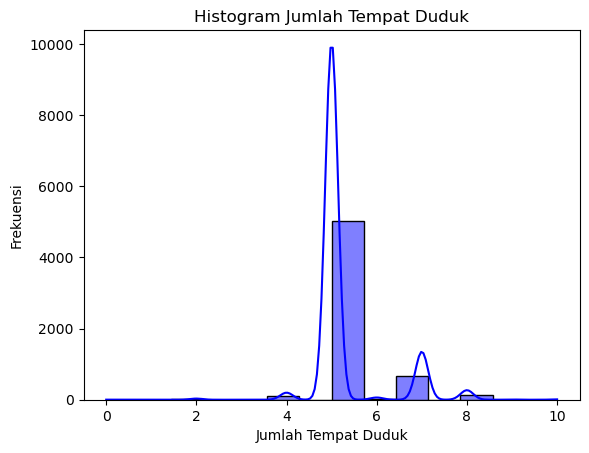

In [29]:
sns.histplot(data['Jumlah Tempat Duduk'], kde=True, bins='auto', color='blue')

plt.title('Histogram Jumlah Tempat Duduk')
plt.xlabel('Jumlah Tempat Duduk')
plt.ylabel('Frekuensi')

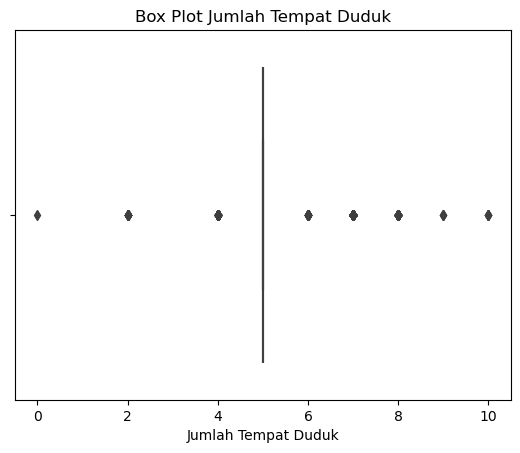

In [30]:
sns.boxplot(x=data['Jumlah Tempat Duduk'])

plt.title('Box Plot Jumlah Tempat Duduk')
plt.xlabel('Jumlah Tempat Duduk')
plt.show()

Secara visual data cukup tersebar merata baik pada nilai kecil maupun rendah. Sehingga sebaiknya kita gunakan Mean utnuk mengisi data yang 

In [31]:
data.isna().sum()

Mobil                   0
Lokasi Terjual          0
Tahun                   0
Odometer (KM)           0
BBM                     0
Transmisi               0
Kepemilikan             0
Efisiensi BBM           2
Kubikasi                0
Tenaga                  0
Jumlah Tempat Duduk    42
Harga                   0
dtype: int64

### Kita isi Jumlah Tempat Duduk kosong dengan Mean

In [32]:
data['Jumlah Tempat Duduk'].fillna(data['Jumlah Tempat Duduk'].mean(), inplace=True)
data.isna().sum()

Mobil                  0
Lokasi Terjual         0
Tahun                  0
Odometer (KM)          0
BBM                    0
Transmisi              0
Kepemilikan            0
Efisiensi BBM          2
Kubikasi               0
Tenaga                 0
Jumlah Tempat Duduk    0
Harga                  0
dtype: int64

Untuk Efisiensi BBM terdapat 2 baris kosong, kita cek dulu sebarannya

Text(0, 0.5, 'Frekuensi')

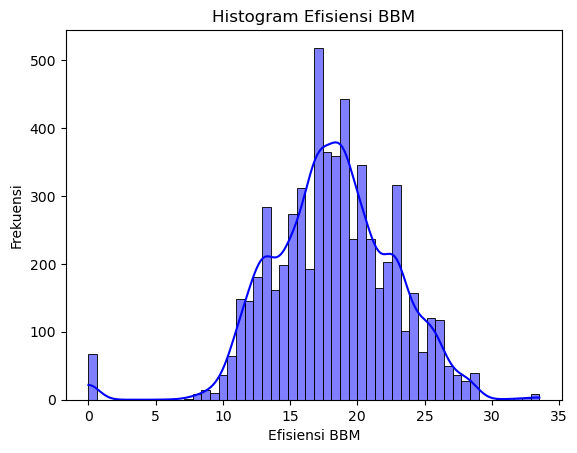

In [33]:
sns.histplot(data['Efisiensi BBM'], kde=True, bins='auto', color='blue')

plt.title('Histogram Efisiensi BBM')
plt.xlabel('Efisiensi BBM')
plt.ylabel('Frekuensi')

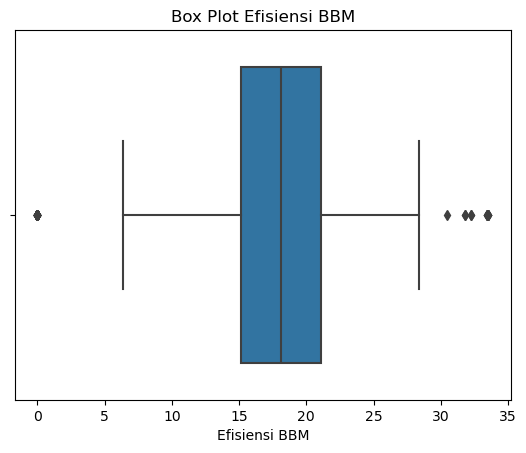

In [34]:
sns.boxplot(x=data['Efisiensi BBM'])

plt.title('Box Plot Efisiensi BBM')
plt.xlabel('Efisiensi BBM')
plt.show()

Secara visual data cukup tersebar merata baik pada nilai kecil maupun rendah. Sehingga sebaiknya kita gunakan Mean utnuk mengisi data yang kosong

In [35]:
data['Efisiensi BBM'].fillna(data['Efisiensi BBM'].mean(), inplace=True)
data.isna().sum()

Mobil                  0
Lokasi Terjual         0
Tahun                  0
Odometer (KM)          0
BBM                    0
Transmisi              0
Kepemilikan            0
Efisiensi BBM          0
Kubikasi               0
Tenaga                 0
Jumlah Tempat Duduk    0
Harga                  0
dtype: int64

### Cek Anomali
kita lihat apakah ada outlier yang mempengaruhi akurasi data kita plus kita cek apakah secara logika masuk akal atau tidak

### Uji Z

In [36]:
data.head()

,Mobil,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [37]:
# Hitung nilai uji z
z_scores = stats.zscore(data["Odometer (KM)"])

# Identifikasi outlier menggunakan Z-Score
threshold = 2.5  # Biasanya dipilih antara 2.5 atau 3
outliers = data['Odometer (KM)'][abs(z_scores) > threshold]

# Tampilkan outliers
print("Outliers:")
print(outliers)

Outliers:
340      775000
358      620000
1528     299322
1860     720000
2328    6500000
2823     480000
3092     480000
3649     300000
4491     445000
Name: Odometer (KM), dtype: int64


Terdapat mobil dengan Odometer mencapai 6500000, saya rasa ini sudah terlalu tinggi dan tidak masuk akal  layak jual. Sehingga saya buang dari data yang akan dihitung

In [38]:
data.drop(2328, inplace = True)

In [39]:
data.iloc[2320:2330]

,Mobil,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
2320,Maruti Celerio LXI,Kolkata,2015,30458,Petrol,Manual,First,23.10,998.0,67.04,5.000000,2.99
2321,Volkswagen Vento 1.6 Highline,Mumbai,2014,46000,Petrol,Manual,First,15.04,1598.0,103.20,5.000000,4.45
2322,Tata Nano XT,Pune,2011,50000,Petrol,Manual,Second,23.90,624.0,37.48,4.000000,0.75
2323,Hyundai Xcent 1.2 Kappa S Option CNG,Delhi,2016,36676,CNG,Manual,First,25.00,1197.0,81.86,5.000000,5.00
2324,Ford EcoSport 1.5 TDCi Titanium,Chennai,2014,72563,Diesel,Manual,Second,22.77,1498.0,98.59,5.000000,5.00
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10,1493.0,97.70,5.278735,4.70
2326,Hyundai Elantra 2.0 SX Option AT,Coimbatore,2015,58239,Petrol,Automatic,First,14.62,1999.0,149.92,5.000000,9.69
2327,Chevrolet Enjoy 1.3 TCDi LTZ 8,Coimbatore,2015,57934,Diesel,Manual,First,18.20,1248.0,73.74,8.000000,5.50
2329,Volkswagen Polo 1.5 TDI Highline,Jaipur,2015,63000,Diesel,Manual,First,20.14,1498.0,88.80,5.000000,5.11
2330,Skoda Fabia 1.2 MPI Ambition Plus,Mumbai,2012,27014,Petrol,Manual,First,16.25,1198.0,75.00,5.000000,2.19


kita cek apakah kolom lain terdapat anomali. Misalnya kolom kursi, secara logika kursi tidak ada yang nilainya nol

In [40]:
data.min()

Mobil                  Ambassador Classic Nova Diesel
Lokasi Terjual                              Ahmedabad
Tahun                                            1998
Odometer (KM)                                     171
BBM                                               CNG
Transmisi                                   Automatic
Kepemilikan                                     First
Efisiensi BBM                                     0.0
Kubikasi                                         72.0
Tenaga                                           34.2
Jumlah Tempat Duduk                               0.0
Harga                                            0.44
dtype: object

Ternyata masih terdapat data yang tidak masuk akal. Selain jumlah tempat duduk, terdapat Efieisnsi BBM yang nilainya 0. Karena secara logika tempat duduk pasti ada minimal 1 dan saya rasa jika efisiensi BBM bernilai 0 jadi terlalu boros, maka kita cari kedua value tersebut lalu kita hapus.

In [41]:
efisiensi_nol = data[data['Efisiensi BBM']==0]
efisiensi_nol

,Mobil,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.000000,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.000000,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,97.7,5.000000,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1493.0,97.7,5.278735,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,5.278735,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,97.7,8.000000,2.20
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.000000,35.00
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,97.7,6.000000,1.70
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.000000,1.39


### Drop Data dengan Efisiensi NOL

In [42]:
data.drop(efisiensi_nol.index, inplace=True)

In [43]:
duduk_nol = data[data['Jumlah Tempat Duduk']==0]
duduk_nol

,Mobil,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,18.0


### Drop Data dengan Jumlah Tempat Duduk NOL

In [44]:
data.drop(duduk_nol.index, inplace=True)

## Memisahkan Kolom Mobil
Kolom Mobil memiliki 2 isi yaitu Brand dan Tipe. Kita pisahkan dalam dua kolom berbeda


In [45]:
data = data[data["Odometer (KM)"] <= 300000]

In [46]:
data.sample()

,Mobil,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
5659,Maruti Swift Dzire LXI,Delhi,2015,24296,Petrol,Manual,First,20.85,1197.0,83.14,5.0,4.65


In [47]:
data['Brand'] = data['Mobil'].str.split(expand=True)[0].str.title()
data['Tipe'] = data['Mobil'].str.split().str[0:2].str.join(' ').str.title()
data.drop(columns = ['Mobil'],inplace = True)

In [48]:
data.head()

,Lokasi Terjual,Tahun,Odometer (KM),BBM,Transmisi,Kepemilikan,Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga,Brand,Tipe
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Maruti Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Hyundai Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Honda Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Maruti Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,Audi A4


Kita susun kolomnya secara Kategorikal dan Numerikal supaya lebih mudah kita lihat dan analisis

In [49]:
new_order = ['Brand', 'Tipe', 'Lokasi Terjual', 'Kepemilikan', 'BBM', 'Transmisi',
             'Tahun', 'Odometer (KM)', 'Efisiensi BBM', 'Kubikasi', 'Tenaga', 'Jumlah Tempat Duduk', 'Harga']
data = data.reindex(columns=new_order)

In [50]:
data.head()

,Brand,Tipe,Lokasi Terjual,Kepemilikan,BBM,Transmisi,Tahun,Odometer (KM),Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
0,Maruti,Maruti Wagon,Mumbai,First,CNG,Manual,2010,72000,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Hyundai Creta,Pune,First,Diesel,Manual,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,Honda,Honda Jazz,Chennai,First,Petrol,Manual,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Maruti Ertiga,Chennai,First,Diesel,Manual,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,Audi,Audi A4,Coimbatore,Second,Diesel,Automatic,2013,40670,15.20,1968.0,140.80,5.0,17.74


# EDA - Exploratory Data Analysis

In [51]:
data.sample()

,Brand,Tipe,Lokasi Terjual,Kepemilikan,BBM,Transmisi,Tahun,Odometer (KM),Efisiensi BBM,Kubikasi,Tenaga,Jumlah Tempat Duduk,Harga
1631,Bmw,Bmw X1,Kochi,First,Diesel,Automatic,2017,32838,17.05,1995.0,190.0,5.0,30.29


Untuk data Continues  kita gunakan Histogram untuk menggali informasi dari distribusi setiap variabel (kolom). Kita bisa memahami kecenderungan distribusi dari dataset yang kita miliki

untuk data Kategorikal kita gunakan Countplot agar kita dapat memvisualisasikan frekuensi dari setiap kategori. Kita bisa dapat representasi fungsi setiap kategori dalam variabel (kolom) yang relevan. 

## EDA - Univariate Analysis untuk Variabel Kategorikal

Analisis satu variabel kategorikal pada satu waktu untuk memahami distribusi dan karakteristiknya.

Keyword yang perlu diingat

Kategorikal: variabel yang tidak memilinilai numerik inheren (Asli emang angka).

#### Brand

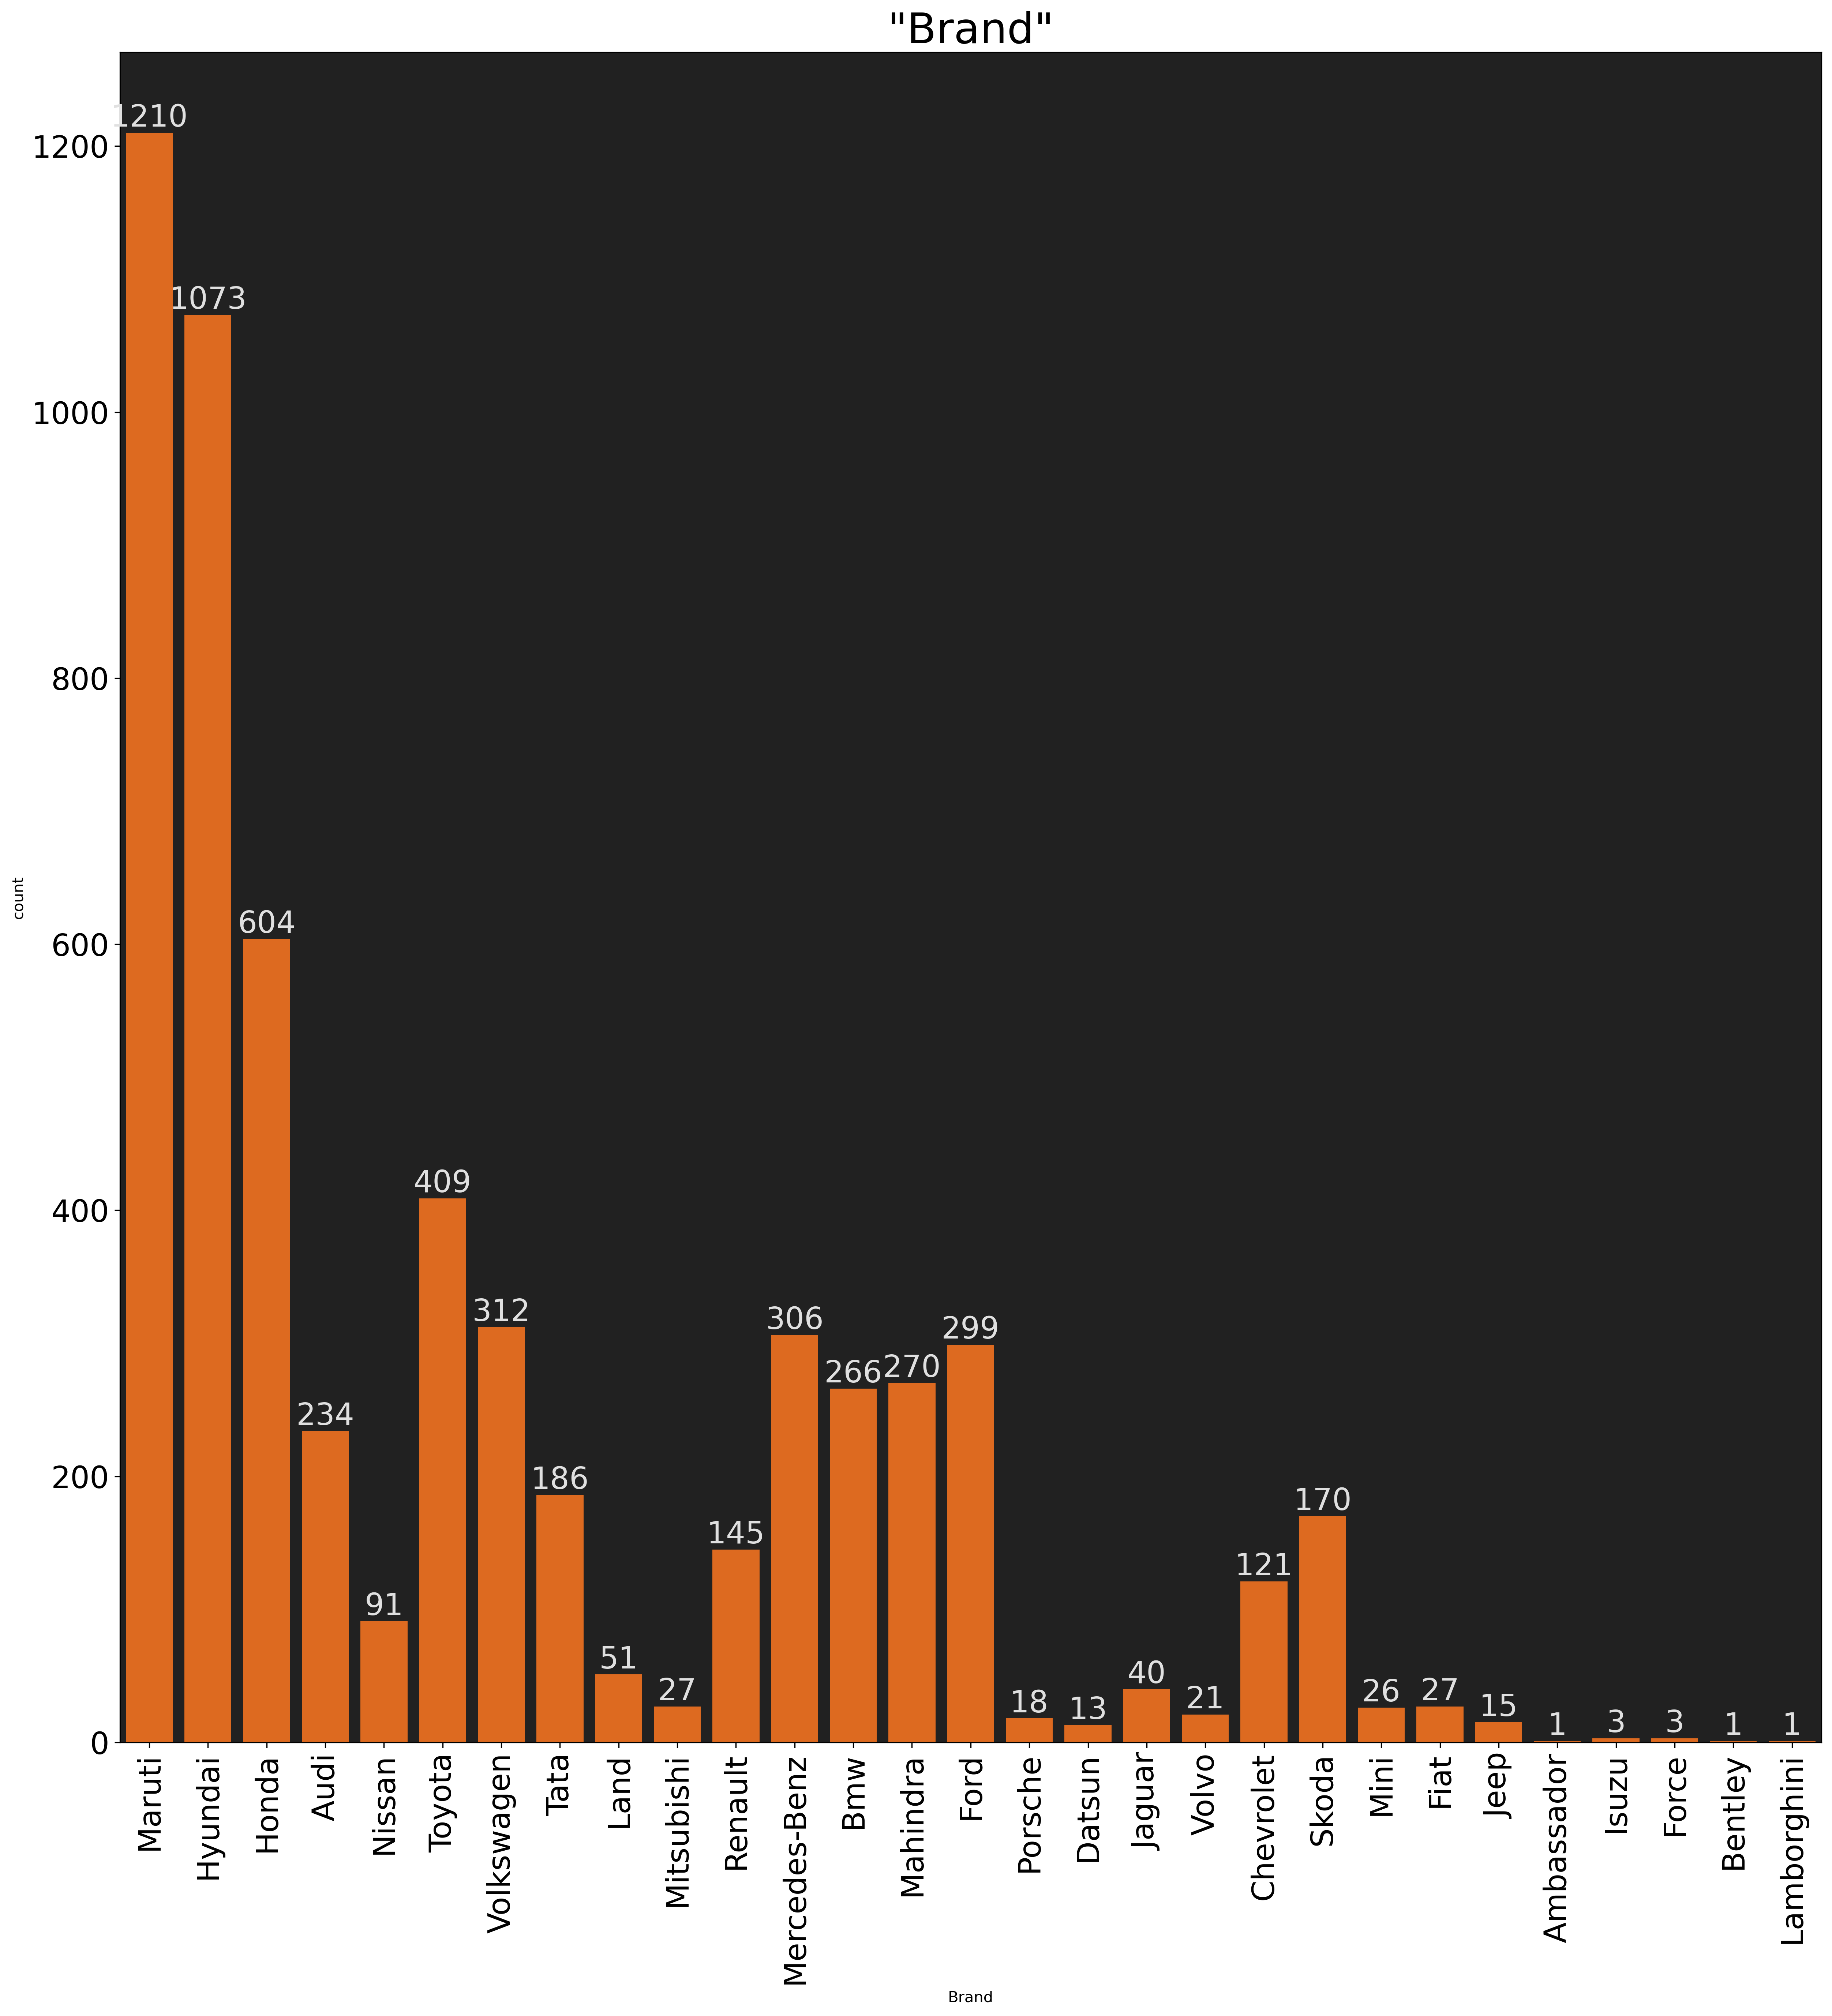

In [52]:
plt.figure(figsize=(20, 20), dpi=300)
graph = sns.countplot(data=data, x='Brand', color='#fd6300')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.title('"Brand"', fontsize=28)
for cont in graph.containers:
        graph.bar_label(cont, color='#e0e0e0', fontsize = 20)  
graph.set_facecolor('#212121')
plt.show()

#### Tipe

In [53]:
data.Tipe.value_counts()

Tipe
Maruti Swift          353
Honda City            266
Hyundai I20           246
Hyundai Verna         170
Toyota Innova         164
                     ... 
Ambassador Classic      1
Volkswagen Beetle       1
Fiat Petra              1
Volkswagen Tiguan       1
Jaguar F                1
Name: count, Length: 211, dtype: int64

In [54]:
threshold = 10
counts = data['Tipe'].value_counts()
tipe_saring = counts[counts >= threshold].index.tolist()
data = data[data['Tipe'].isin(tipe_saring)]

Untuk pemahaman yang lebih baik tentang kolom "Tipe", model dengan frekuensi kurang dari 10 tidak disertakan dalam grafik.

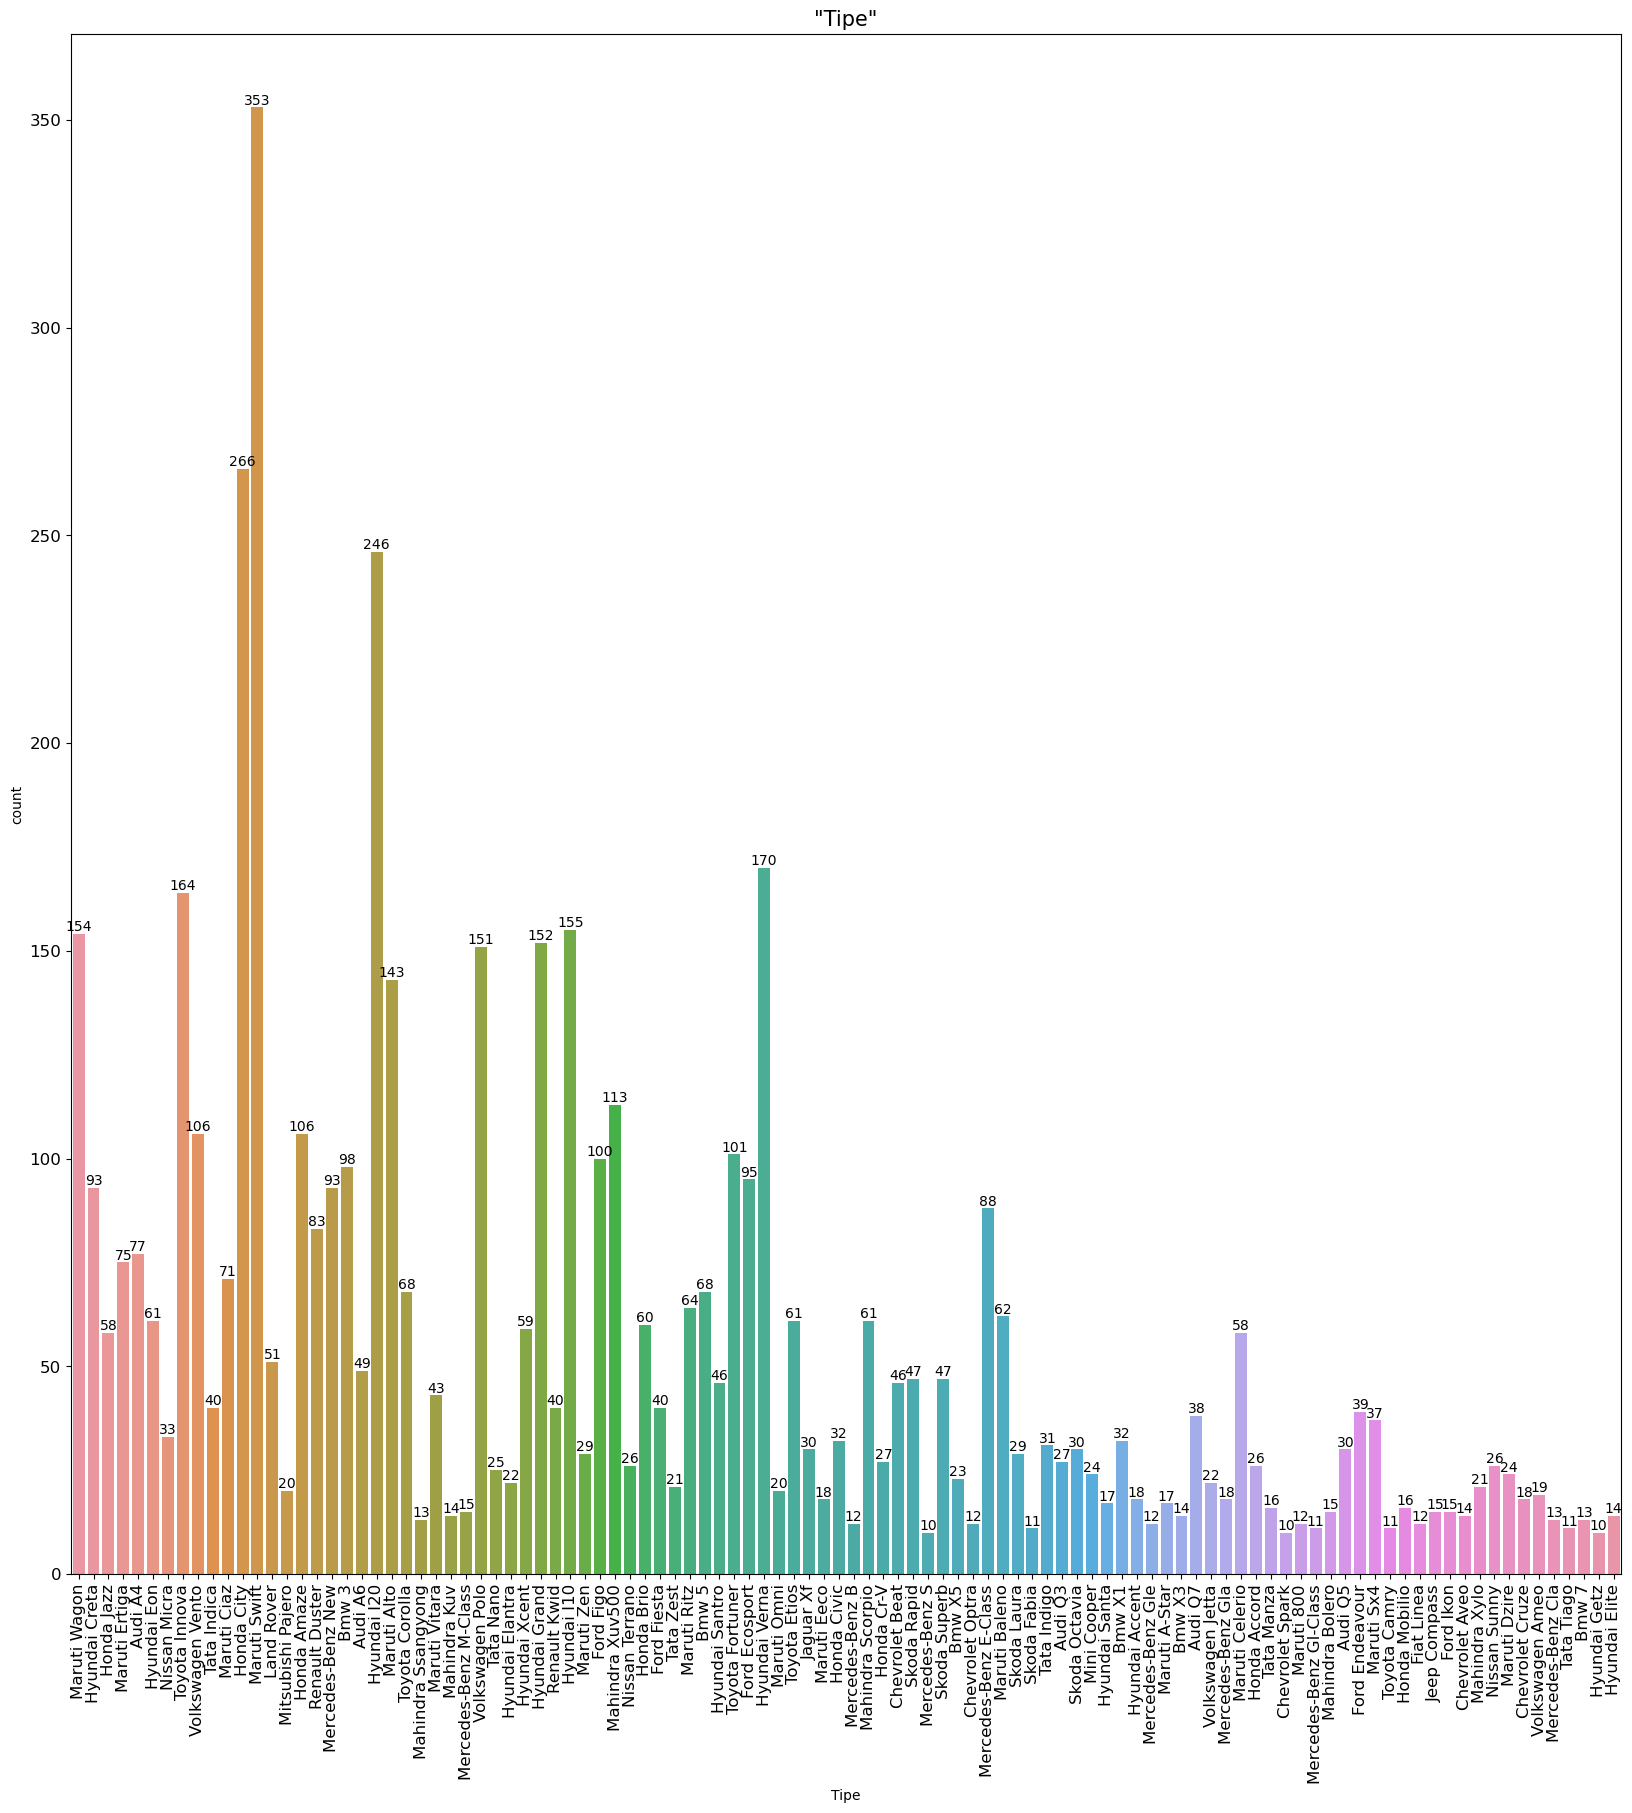

In [55]:
plt.figure(figsize=(20,20), dpi=100)
graph = sns.countplot(data=data, x='Tipe')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Tipe"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()